# Programming Project #1: Hybrid Images

## CS445: Computational Photography

### Part I: Hybrid Images

#### Imporing Packages

In [ ]:
# Optional, if using Google Colab w/ Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [1]:
# Installing required packages 
%pip install opencv-contrib-python # Had to install the latest versions - older versions of libraries and python were giving alot of issues
%pip install scipy


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2

import numpy as np
from matplotlib.colors import LogNorm
from scipy import signal

# modify to where you store your project data including utils.py
datadir = "/Users/zainaqasim/Documents/UIUC Spring Courses/CS 445 Computational Photography/Project One- Hybrid Images/hybrid/" 

utilfn = datadir + "utils.py"
!cp "$utilfn" .
import utils

cp: ./utils.py and /Users/zainaqasim/Documents/UIUC Spring Courses/CS 445 Computational Photography/Project One- Hybrid Images/hybrid/utils.py are identical (not copied).


In [3]:
# switch from notebook to inline if using colab or otherwise cannot use interactive display)
#%matplotlib notebook  
import matplotlib.pyplot as plt

In [321]:
import math

#### Methods for working with Hybrid Images

In [15]:
# FFT of images
def display_fft(im1, im2):
  fftmag_im1 = np.abs(np.fft.fftshift(np.fft.fft2(im1)))
  fftmag_im2 = np.abs(np.fft.fftshift(np.fft.fft2(im2)))

  plt.figure(figsize=(12, 6))

  # Plot the magnitude of the FFTs
  plt.subplot(1, 2, 1)
  plt.imshow(fftmag_im1,norm=LogNorm(fftmag_im1.min(),fftmag_im1.max()),cmap='jet')
  plt.title('FFT of Image 1')

  plt.subplot(1, 2, 2)
  plt.imshow(fftmag_im2,norm=LogNorm(fftmag_im2.min(),fftmag_im2.max()),cmap='jet')
  plt.title('FFT of Image 2')




In [163]:
def hybridImage(im1, im2, sigma_low, sigma_high):
    '''
    Inputs:
        im1:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        im2:    RGB (height x width x 3) or a grayscale (height x width) image
                as a numpy array.
        sigma_low: standard deviation for the low-pass filter
        sigma_high: standard deviation for the high-pass filter
        
    Output:
        Return the combination of both images, one filtered with a low-pass filter
        and the other with a high-pass filter.
        
    ''' 
        
    # ksize = np.int(np.ceil(sigma)*6+1)
    # fil = cv2.getGaussianKernel(ksize, sigma) # 1D kernel
    # fil = fil*np.transpose(fil) # 2D kernel by outer product


    # Apply Gaussian low-pass filter to im1
    gauss_1d_kernel_low = cv2.getGaussianKernel(np.ceil(sigma_low)*6+1, sigma_low)
    gauss_2d_kernel_low = gauss_1d_kernel_low * np.transpose(gauss_1d_kernel_low)
    im1_low_pass = cv2.filter2D(im1, -1, gauss_2d_kernel_low)


    # Apply Implulse minus Gaussian high-pass filter to im2
    gauss_1d_kernel_high = cv2.getGaussianKernel(np.ceil(sigma_high)*6+1, sigma_high)
    gauss_2d_kernel_high = gauss_1d_kernel_high * np.transpose(gauss_1d_kernel_high)
    im2_high_pass = im2 - cv2.filter2D(im2, -1, gauss_2d_kernel_high)

    # Combine the low-pass and high-pass filtered images by averaging them
    hybrid_image = (im1_low_pass + im2_high_pass) / 2

    # Plot the filtered images
    plt.figure(figsize=(12, 6))

    plt.subplot(1,3,1)
    plt.imshow(im1_low_pass, cmap='gray')
    plt.title('Low-Pass (Image 1)')
    plt.axis('off')

    plt.subplot(1,3,2)
    plt.imshow(im2_high_pass, cmap='gray')
    plt.title('High-Pass (Image 2)')
    plt.axis('off')

    plt.show()


    # Return the hybrid image
    return hybrid_image





In [322]:
# Between 1 - 5% of the image height and width
def get_starting_sigma_suggestions(im1, im2):
  im1_height, im1_width = im1.shape
  im2_height, im2_width = im2.shape
  print(im1_height, im1_width, im2_height, im2_width)
  print(f'Image 1 Range:\n\tHeight: {math.ceil(im1_height*0.01)} - {math.ceil(im1_height*0.05)}\n\tWidth:{math.ceil(im1_width*0.01)} - {math.ceil(im1_width*0.05)}')
  print(f'Image 2 Range:\n\tHeight: {math.ceil(im2_height*0.01)} - {math.ceil(im2_height*0.05)}\n\tWidth:{math.ceil(im2_width*0.01)} - {math.ceil(im2_width*0.05)}')

#### Starter Code- Hybrid Image using Derek and Nutmeg's Photos

In [325]:
im1_file = datadir + 'nutmeg.jpg'
im2_file = datadir + 'DerekPicture.jpg'

im1 = np.float32(cv2.imread(im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

In [326]:
#pts_im1 = utils.prompt_eye_selection(im1)
pts_im1 = np.array([[607, 290], [748, 370]]) # uncomment if entering [x, y] pts manually
#plt.plot(pts_im1[:,0], pts_im1[:,1], 'r-+')

In [327]:
#pts_im2 = utils.prompt_eye_selection(im2)
pts_im2 = np.array([[299,343], [439,331]]) # uncomment if entering [x, y] pts manually
# plt.plot(pts_im2[:,0], pts_im2[:,1], 'r-+')

In [328]:
im1, im2 = utils.align_images(im1_file, im2_file,pts_im1,pts_im2,save_images=False)


In [329]:
# convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

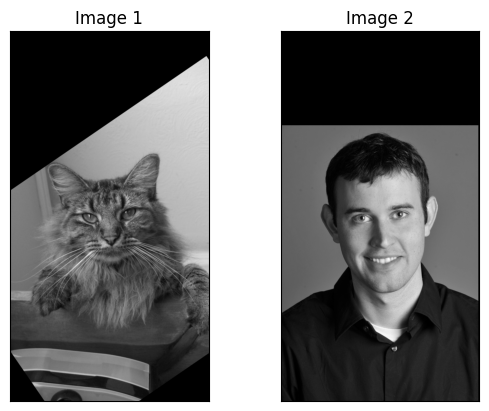

In [330]:
#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

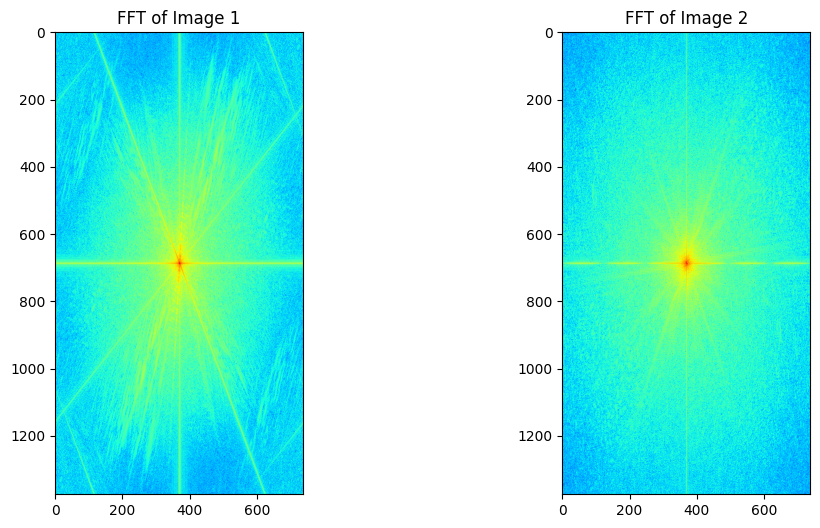

In [331]:
# Display FFTs of images
display_fft(im1, im2)


In [332]:
get_starting_sigma_suggestions(im1, im2)

1374 738 1374 738
Image 1 Range:
	Height: 14 - 69
	Width:8 - 37
Image 2 Range:
	Height: 14 - 69
	Width:8 - 37


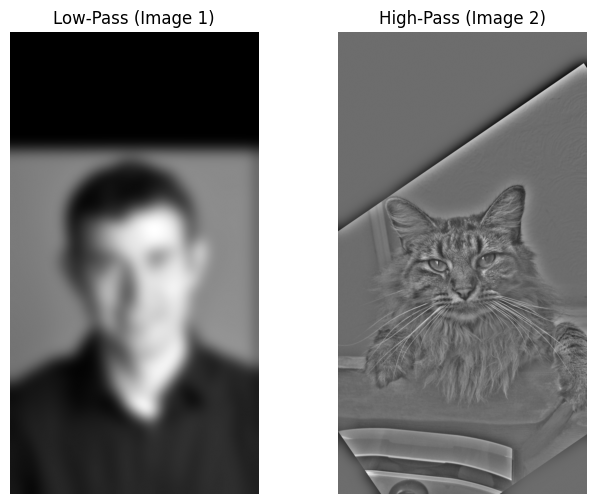

In [333]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 20

im_hybrid = hybridImage(im2, im1, sigma_low, sigma_high)



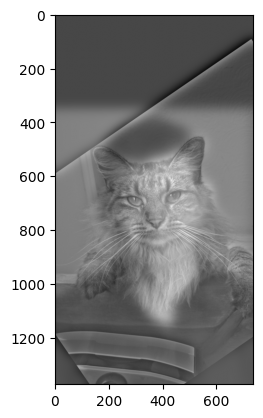

In [334]:
# Show the hybrid image
plt.imshow(im_hybrid, cmap='gray')
plt.show()

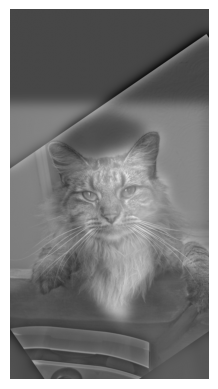

In [335]:
# Optional: Select top left corner and bottom right corner to crop image
# the function returns dictionary of 
# {
#   'cropped_image': np.ndarray of shape H x W

#   'crop_bound': np.ndarray of shape 2x2
# }
cropped_object = utils.interactive_crop(im_hybrid)

#### Applying above approach to new images

##### Hybrid Image 1 - Chicago Skyline / River vs. Woods

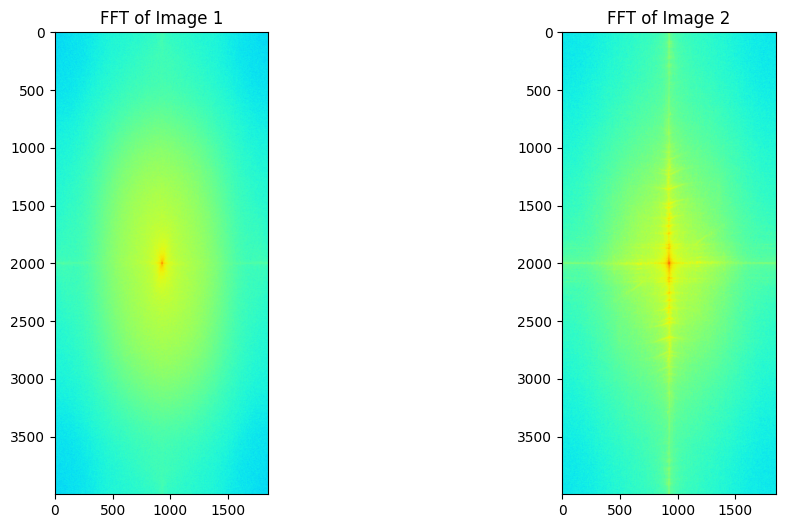

In [346]:
# Load images

hy1_im1 = datadir + 'images/trees_vertical_2.jpg'
hy1_im2 = datadir + 'images/chicago_skyline_vertical.jpg'

im1 = np.float32(cv2.imread(hy1_im1, cv2.IMREAD_GRAYSCALE) / 255.0)
im2 = np.float32(cv2.imread(hy1_im2, cv2.IMREAD_GRAYSCALE) / 255.0)

#pts_im1 = np.array([[607, 290], [748, 370]])
#pts_im2 = np.array([[299,343], [439,331]])

#im1, im2 = utils.align_images(hy1_im1, hy1_im2, pts_im1, pts_im2, save_images=False)

#im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
#im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

display_fft(im1, im2)




In [347]:
get_starting_sigma_suggestions(im1, im2)

4000 1848 4000 1848
Image 1 Range:
	Height: 40 - 200
	Width:19 - 93
Image 2 Range:
	Height: 40 - 200
	Width:19 - 93


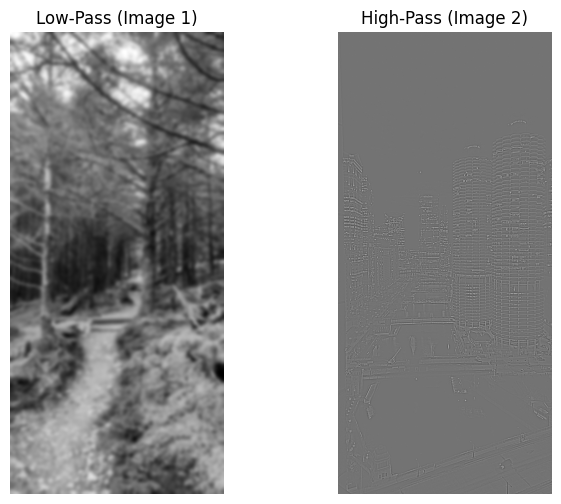

In [348]:
# Create hybrid image

sigma_low = 15 # choose parameters that work for your images
sigma_high = 5

im_hybrid = hybridImage(im1, im2, sigma_low, sigma_high)


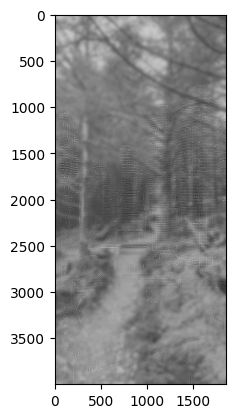

In [349]:
# Display the hybrid image
plt.imshow(im_hybrid, cmap='gray')
plt.show()

##### Hybrid Image 2 - Alcatraz vs SF skyline

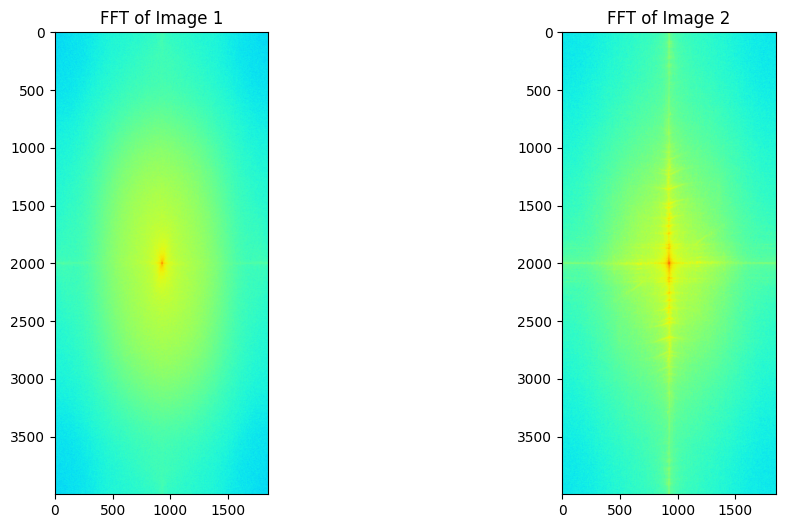

In [350]:
hy2_im1_file = datadir + 'images/alcatraz.jpg'
hy2_im2_file = datadir + 'images/sf_skyline.jpg'

hy2_im1 = np.float32(cv2.imread(hy2_im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
hy2_im2 = np.float32(cv2.imread(hy2_im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

display_fft(im1, im2)

In [351]:
# Start with these values
get_starting_sigma_suggestions(im1, im2)

4000 1848 4000 1848
Image 1 Range:
	Height: 40 - 200
	Width:19 - 93
Image 2 Range:
	Height: 40 - 200
	Width:19 - 93


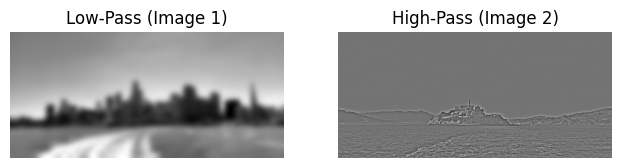

In [352]:
sigma_low = 40 # choose parameters that work for your images
sigma_high = 20

im_hybrid_2 = hybridImage(hy2_im2, hy2_im1, sigma_low, sigma_high)


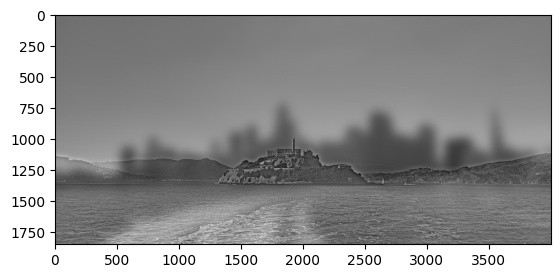

In [ ]:
# Display the hybrid image
plt.imshow(im_hybrid_2, cmap='gray')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.64949936..0.7215195].


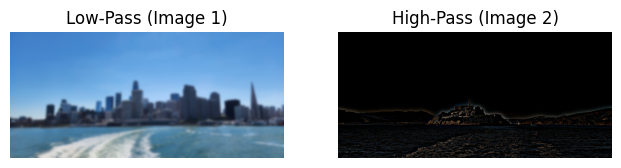

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.18096718..0.784694].


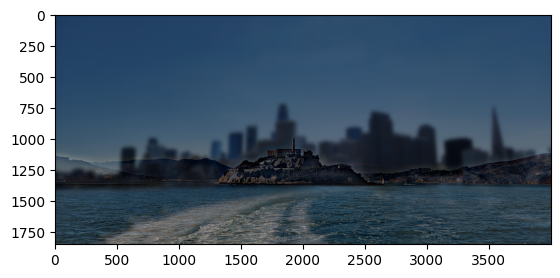

In [231]:
# Colored Hybrid Image
hy2_im1_color = np.float32(cv2.imread(hy2_im1_file, cv2.IMREAD_COLOR_RGB) / 255.0)
hy2_im2_color = np.float32(cv2.imread(hy2_im2_file, cv2.IMREAD_COLOR_RGB) / 255.0)

im_hybrid_2_color = hybridImage(hy2_im2_color, hy2_im1_color, sigma_low, sigma_high)

# Display the hybrid image
plt.imshow(im_hybrid_2_color)
plt.show()


##### Hybrid Image 3


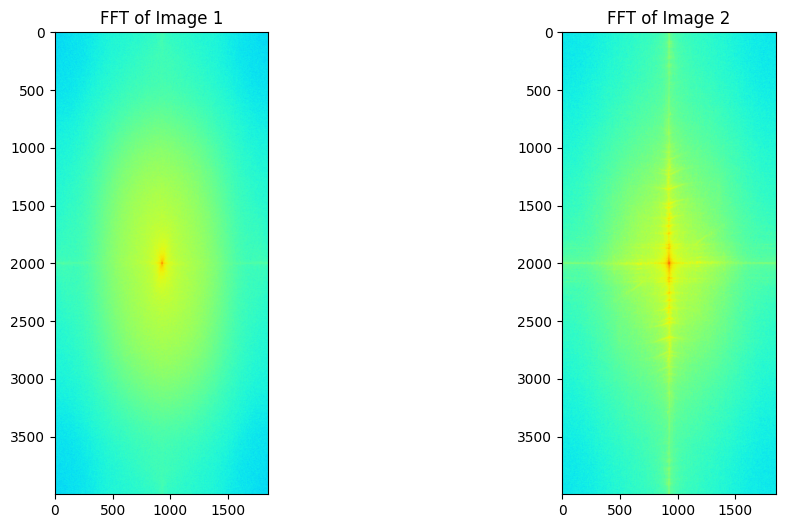

In [232]:
hy3_im1_file = datadir + 'images/glue_stick.jpeg'
hy3_im2_file = datadir + 'images/lipstick.jpeg'

hy3_im1 = np.float32(cv2.imread(hy3_im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
hy3_im2 = np.float32(cv2.imread(hy3_im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)
display_fft(im1, im2)

In [353]:
# Start with these values
get_starting_sigma_suggestions(im1, im2)

4000 1848 4000 1848
Image 1 Range:
	Height: 40 - 200
	Width:19 - 93
Image 2 Range:
	Height: 40 - 200
	Width:19 - 93


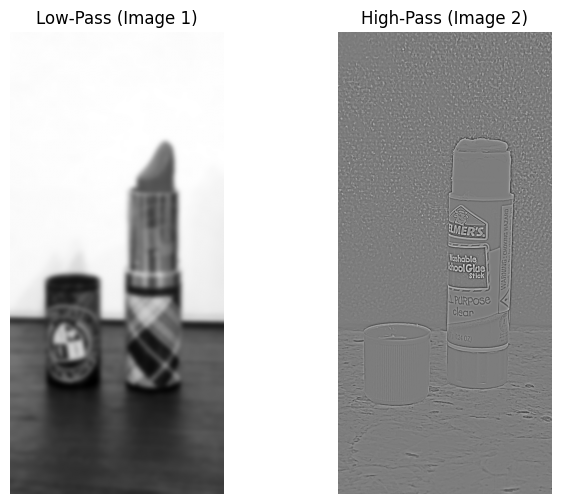

In [355]:
sigma_low = 20 # choose parameters that work for your images
sigma_high = 10

im_hybrid_3 = hybridImage(hy3_im2, hy3_im1, sigma_low, sigma_high)

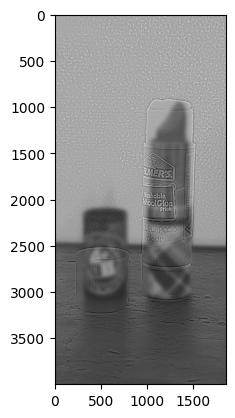

In [356]:
plt.imshow(im_hybrid_3, cmap='gray')
plt.show()

##### Hybrid Image 4: Self Smile with Mac(Cat) 

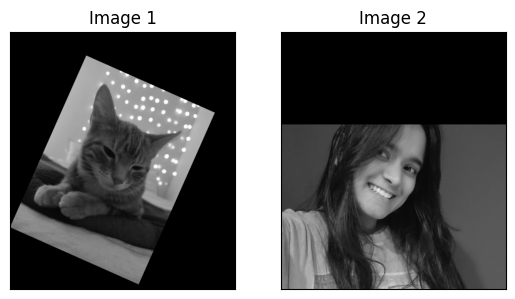

In [357]:
hy4_im1_file = datadir + 'images/mac_2.jpeg'
hy4_im2_file = datadir + 'images/self_smile.jpg'

hy4_im1 = np.float32(cv2.imread(hy4_im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
hy4_im2 = np.float32(cv2.imread(hy4_im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

pts_im1 = np.array([[1392, 1834], [2132, 1896]])
pts_im2 = np.array([[956,153], [1111,238]])

im1, im2 = utils.align_images(hy4_im1_file, hy4_im2_file, pts_im1, pts_im2, save_images=False)

#Convert to grayscale
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) / 255.0
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) / 255.0

#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

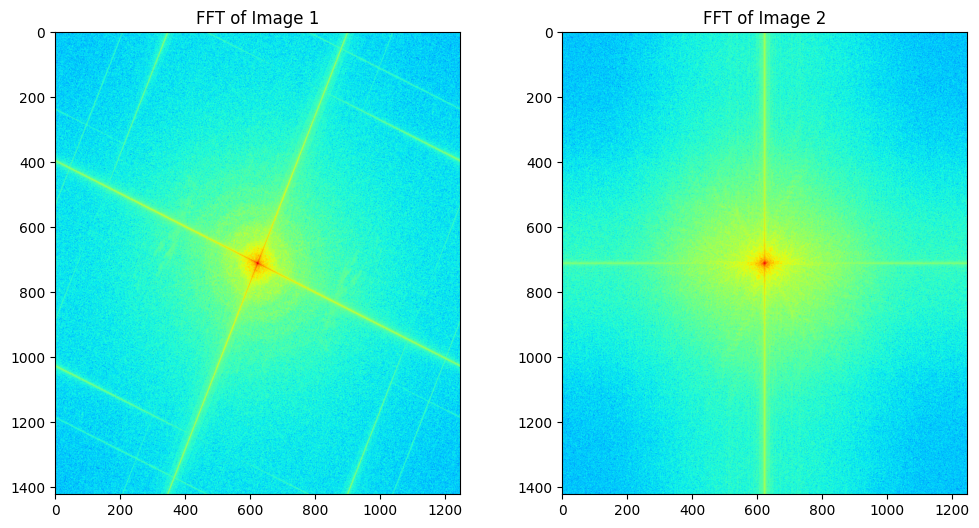

In [311]:
# Display FFTs of images
display_fft(im1, im2)

In [359]:
# Start with these values
get_starting_sigma_suggestions(im1, im2)

1422 1246 1422 1246
Image 1 Range:
	Height: 15 - 72
	Width:13 - 63
Image 2 Range:
	Height: 15 - 72
	Width:13 - 63


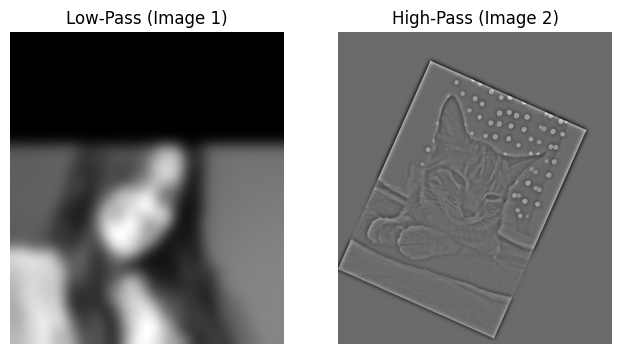

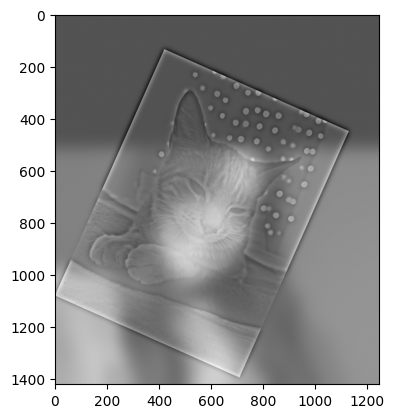

In [360]:

# Create hybrid image

sigma_low = 30 # choose parameters that work for your images
sigma_high = 10

im_hybrid_4 = hybridImage(im2, im1, sigma_low, sigma_high)

# Display the hybrid image
plt.imshow(im_hybrid_4, cmap='gray')
plt.show()

##### Hybrid Image 5: Self Neutral to Smiling

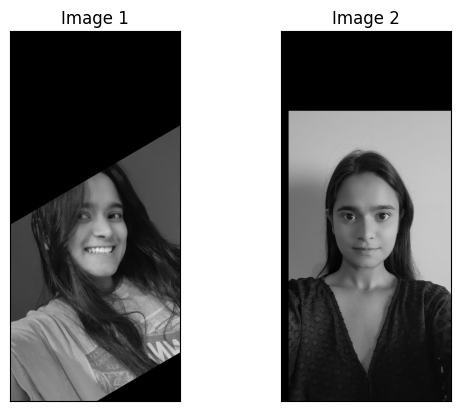

In [371]:
hy5_im1_file = datadir + 'images/self_smile.jpg'
hy5_im2_file = datadir + 'images/self_neutral_2.jpeg'

hy5_im1 = np.float32(cv2.imread(hy5_im1_file, cv2.IMREAD_GRAYSCALE) / 255.0)
hy5_im2 = np.float32(cv2.imread(hy5_im2_file, cv2.IMREAD_GRAYSCALE) / 255.0)

pts_im1 = np.array([[956,153], [1111,238]])
pts_im2 = np.array([[409, 699], [621, 693]])

hy5_im1, hy5_im2 = utils.align_images(hy5_im1_file, hy5_im2_file, pts_im1, pts_im2, save_images=False)

#Convert to grayscale
hy5_im1 = cv2.cvtColor(hy5_im1, cv2.COLOR_BGR2GRAY) / 255.0
hy5_im2 = cv2.cvtColor(hy5_im2, cv2.COLOR_BGR2GRAY) / 255.0

#Images sanity check
fig, axes = plt.subplots(1, 2)
axes[0].imshow(hy5_im1,cmap='gray')
axes[0].set_title('Image 1'), axes[0].set_xticks([]), axes[0].set_yticks([])
axes[1].imshow(hy5_im2,cmap='gray')
axes[1].set_title('Image 2'), axes[1].set_xticks([]), axes[1].set_yticks([]);

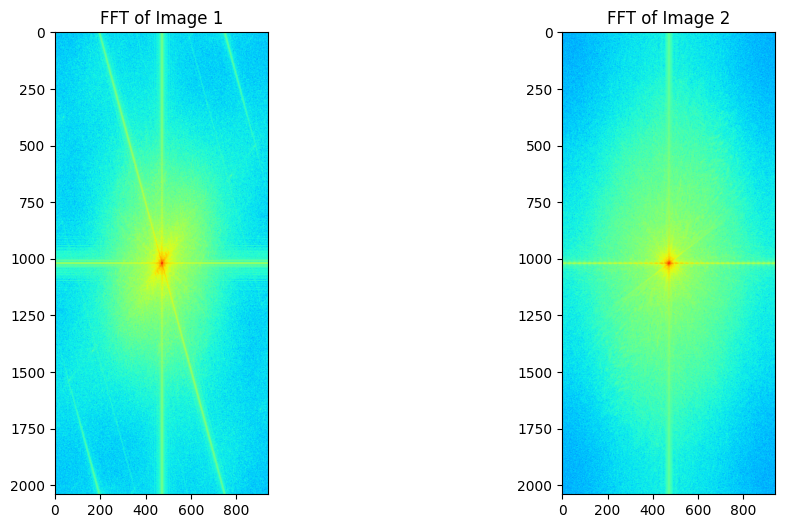

In [372]:
# Display FFTs of images
display_fft(hy5_im1, hy5_im2)

In [373]:
# Start with these values
get_starting_sigma_suggestions(hy5_im1, hy5_im2)

2040 941 2040 941
Image 1 Range:
	Height: 21 - 102
	Width:10 - 48
Image 2 Range:
	Height: 21 - 102
	Width:10 - 48


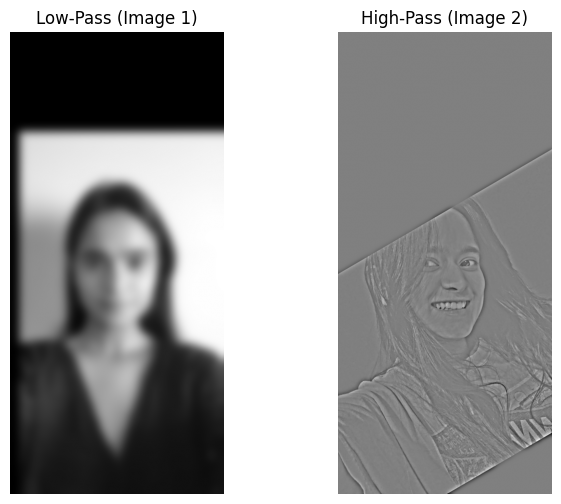

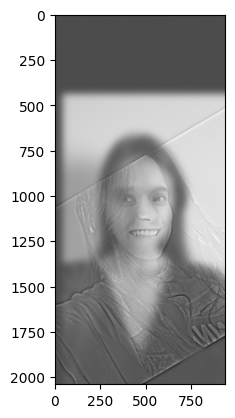

In [379]:

# Create hybrid image

sigma_low = 20 # choose parameters that work for your images
sigma_high = 10

im_hybrid_5 = hybridImage(hy5_im2, hy5_im1, sigma_low, sigma_high)

# Display the hybrid image
plt.imshow(im_hybrid_5, cmap='gray')
plt.show()

### Part II: Image Enhancement

##### Two out of three types of image enhancement are required.  Choose a good image to showcase each type and implement a method.  This code doesn't rely on the hybrid image part.

#### Contrast enhancement

##### Methods

In [293]:
def enhance_contrast(image_path, filter_type='histogram_equalization', gamma=1.5):
  
  # Read the image
  im_contr_enhan_original = np.float32(cv2.imread(image_path, cv2.IMREAD_COLOR_BGR) / 255.0)

  if filter_type == 'gamma_correction':
    # Apply gamma correction
    gamma = 1.5
    im_contr_enhan_gamma = np.power(im_contr_enhan_original, gamma)
    im_contr_enhan_enhanced = np.clip(im_contr_enhan_gamma, 0, 1)

  else:
    # Convert to YCrCb
    im_contr_enhan_ycrcb = cv2.cvtColor(im_contr_enhan_original, cv2.COLOR_BGR2YCrCb)

    # Equalize the Y channel
    y_u8 = (np.clip(im_contr_enhan_ycrcb[:, :, 0], 0, 1) * 255).astype(np.uint8)
    im_contr_enhan_ycrcb[:, :, 0] = cv2.equalizeHist(y_u8).astype(np.float32) / 255.0

    # Convert back to BGR
    im_contr_enhan_enhanced = cv2.cvtColor(im_contr_enhan_ycrcb, cv2.COLOR_YCrCb2BGR)

  # Display before and after images
  
  # Create a figure and a 2x2 grid of axes 
  fig, axs = plt.subplots(2, 2, layout='constrained')

  axs[0, 0].plot([1, 2, 3]) 
  axs[0, 0].set_title('Original Image')
  axs[0, 0].imshow(cv2.cvtColor(im_contr_enhan_original, cv2.COLOR_BGR2RGB))
  axs[0, 0].axis('off')

  axs[0, 1].plot([1, 2, 3])
  axs[0, 1].set_title('Enhanced Image')
  axs[0, 1].imshow(np.clip(cv2.cvtColor(im_contr_enhan_enhanced, cv2.COLOR_BGR2RGB), 0, 1))
  axs[0, 1].axis('off')

  axs[1, 0].plot([1, 2, 3])
  axs[1, 0].set_title('Original Image (Grayscale)')
  axs[1, 0].imshow(cv2.cvtColor(im_contr_enhan_original, cv2.COLOR_BGR2GRAY), cmap='gray')
  axs[1, 0].axis('off')

  axs[1, 1].plot([1, 2, 3])
  axs[1, 1].set_title('Enhanced Image (Grayscale)')
  axs[1, 1].imshow(np.clip(cv2.cvtColor(im_contr_enhan_enhanced, cv2.COLOR_BGR2GRAY), 0, 1), cmap='gray')
  axs[1, 1].axis('off')

  plt.show()




##### Image 1: Haight Ashbury: Tie Dye Emporium

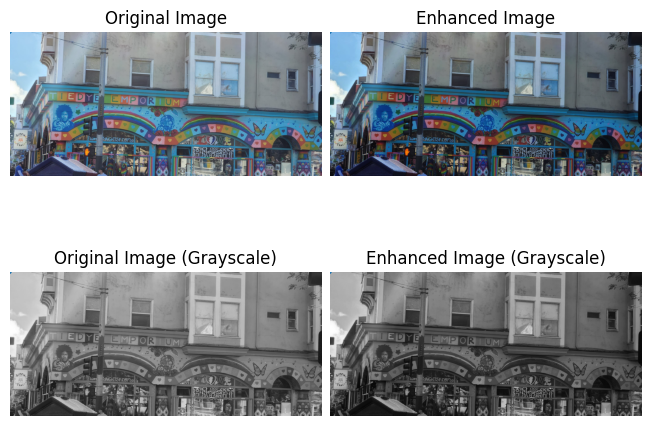

In [290]:
# Contrast enhancement
im_contr_enhan_dir = datadir + 'images/haight_ashbury.jpeg'
enhance_contrast(im_contr_enhan_dir, filter_type='gamma_correction', gamma=2)


##### Image 2: Unknown Location (Plane View)

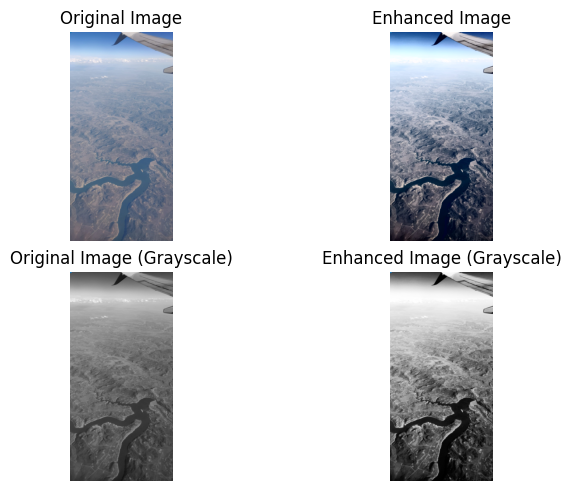

In [283]:
# Contrast enhancement
im_contr_enhan_dir = datadir + 'images/unkonwn_location_plane_view.jpeg'
enhance_contrast(im_contr_enhan_dir)


##### Image 3: Presidio Hiking

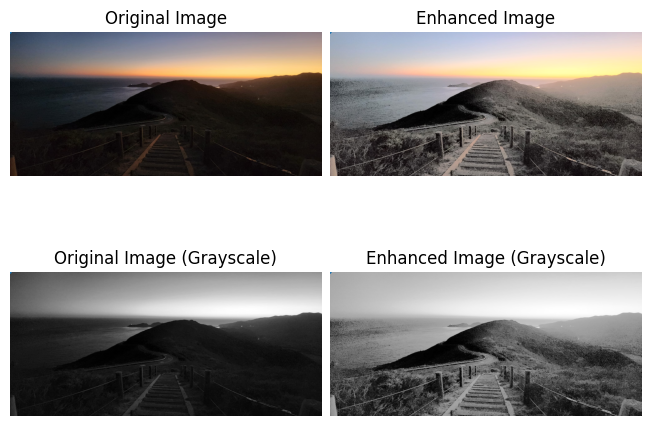

In [381]:
# Contrast enhancement
im_contr_enhan_dir = datadir + 'images/presidio_hiking.jpeg'
enhance_contrast(im_contr_enhan_dir)


#### Color enhancement 

##### Methods for Color Enhancement

In [394]:
def enhance_color(image_path, saturation_factor=1.5):
  # Load image
  im_color_enhan_original = np.float32(cv2.imread(image_path, cv2.IMREAD_COLOR_BGR) / 255.0)

  # Convert to HSV
  im_color_enhan_hsv = cv2.cvtColor(im_color_enhan_original, cv2.COLOR_BGR2HSV)

  # Enhance color
  im_color_enhan_hsv[:, :, 1] = np.clip(im_color_enhan_hsv[:, :, 1] * saturation_factor, 0, 1)

  # Convert back to BGR
  im_color_enhan_enhanced = cv2.cvtColor(im_color_enhan_hsv, cv2.COLOR_HSV2BGR)

  # Display before and after images
  fig, axs = plt.subplots(1, 2, layout='constrained')
  axs[0].imshow(cv2.cvtColor(im_color_enhan_original, cv2.COLOR_BGR2RGB))
  axs[0].axis('off')
  axs[1].imshow(cv2.cvtColor(im_color_enhan_enhanced, cv2.COLOR_BGR2RGB))
  axs[1].axis('off')
  plt.show()


##### Image 1: Golden Gate Bridge at Dawn

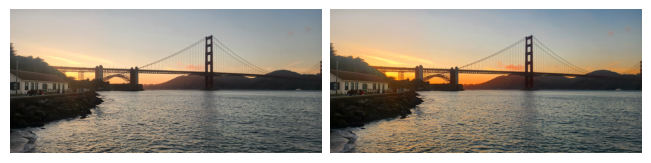

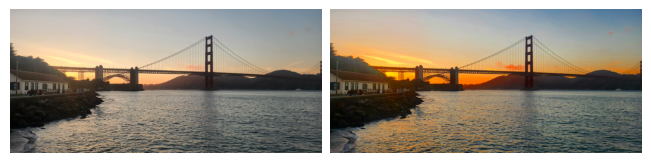

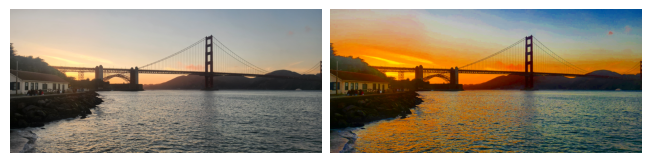

In [396]:
# Load image
im_color_enhan_dir = datadir + 'images/sf_golden_gate.jpeg'

enhance_color(im_color_enhan_dir, saturation_factor=1.5)
enhance_color(im_color_enhan_dir, saturation_factor=2)
enhance_color(im_color_enhan_dir, saturation_factor=4)

##### Image 2: Burnet Woods past Dawn

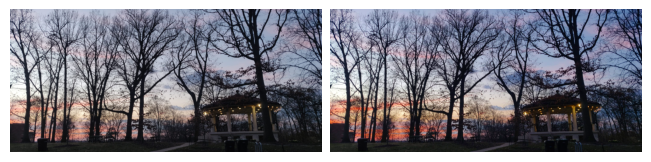

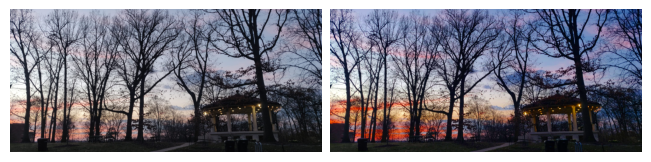

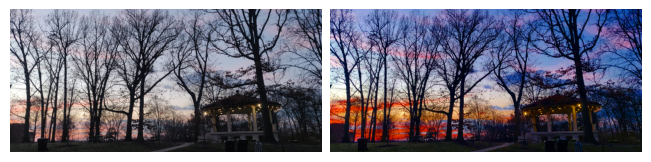

In [397]:
# Load image
im_color_enhan_dir = datadir + 'images/burnet_woods.jpeg'

enhance_color(im_color_enhan_dir)
enhance_color(im_color_enhan_dir, saturation_factor=2)
enhance_color(im_color_enhan_dir, saturation_factor=3)

##### Image 3: Mt. Le Conte Cliff 

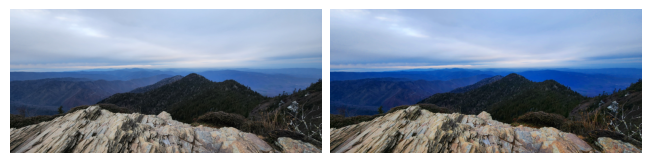

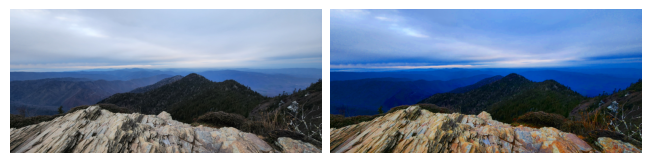

In [399]:
# Load image
im_color_enhan_dir = datadir + 'images/mt_le_conte_cliff.jpg'

enhance_color(im_color_enhan_dir)
enhance_color(im_color_enhan_dir, saturation_factor=2.5)

#### Color shift

##### Methods for Color Shifting

In [410]:
def color_shift(image_path, a_shift=0, b_shift=0):
  # Load image
  im_color_shift_original = np.float32(cv2.imread(image_path, cv2.IMREAD_COLOR_BGR) / 255.0)

  # Convert to Lab
  im_color_shift_lab = cv2.cvtColor(im_color_shift_original, cv2.COLOR_BGR2Lab)

  # Shift the color
  im_color_shift_lab[:, :, 1] = im_color_shift_lab[:, :, 1] + a_shift
  im_color_shift_lab[:, :, 2] = im_color_shift_lab[:, :, 2] + b_shift

  # Convert back to BGR
  im_color_shift_enhanced = cv2.cvtColor(im_color_shift_lab, cv2.COLOR_LAB2RGB)

  # Display before and after images
  fig, axs = plt.subplots(1, 2, layout='constrained')
  axs[0].imshow(cv2.cvtColor(im_color_shift_original, cv2.COLOR_BGR2RGB))
  axs[0].axis('off')
  axs[1].imshow(cv2.cvtColor(im_color_shift_enhanced, cv2.COLOR_BGR2RGB))
  axs[1].axis('off')
  plt.show()


##### Image 1: Random Pier in Sausalito by Presidio Yatch Club

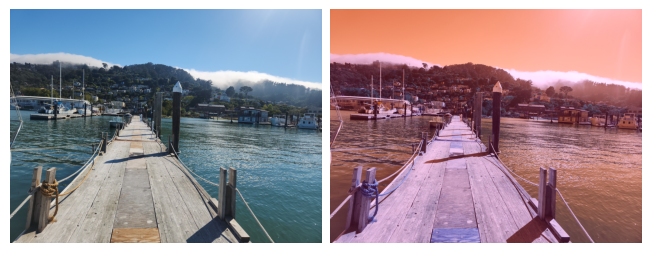

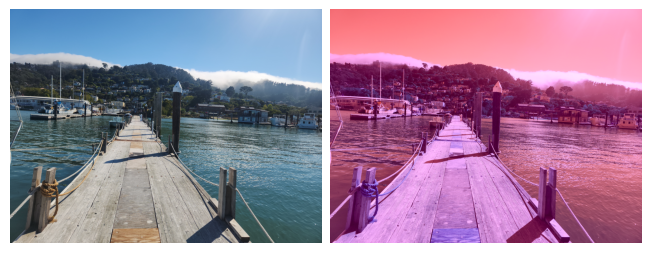

In [412]:
im_color_shift_dir = datadir + 'images/pier.jpg'
color_shift(im_color_shift_dir, a_shift=20, b_shift=-20)
color_shift(im_color_shift_dir, a_shift=40, b_shift=-30)

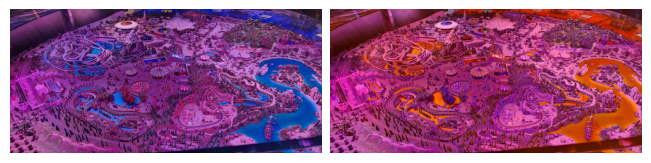

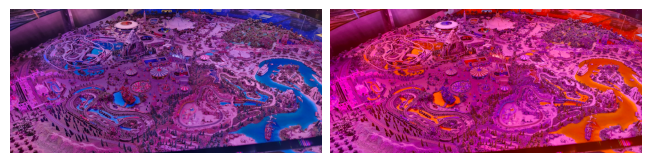

In [414]:
im_color_shift_dir = datadir + 'images/disney_model.jpg'
color_shift(im_color_shift_dir, a_shift=5, b_shift=-20)
color_shift(im_color_shift_dir, a_shift=20, b_shift=-30)